In [10]:
# import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
# import glob
import pandas as pd

from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2


plt.style.use('ggplot')

C:\Users\soysa\AppData\Local\Temp\ipykernel_18564\2694873142.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16,9))


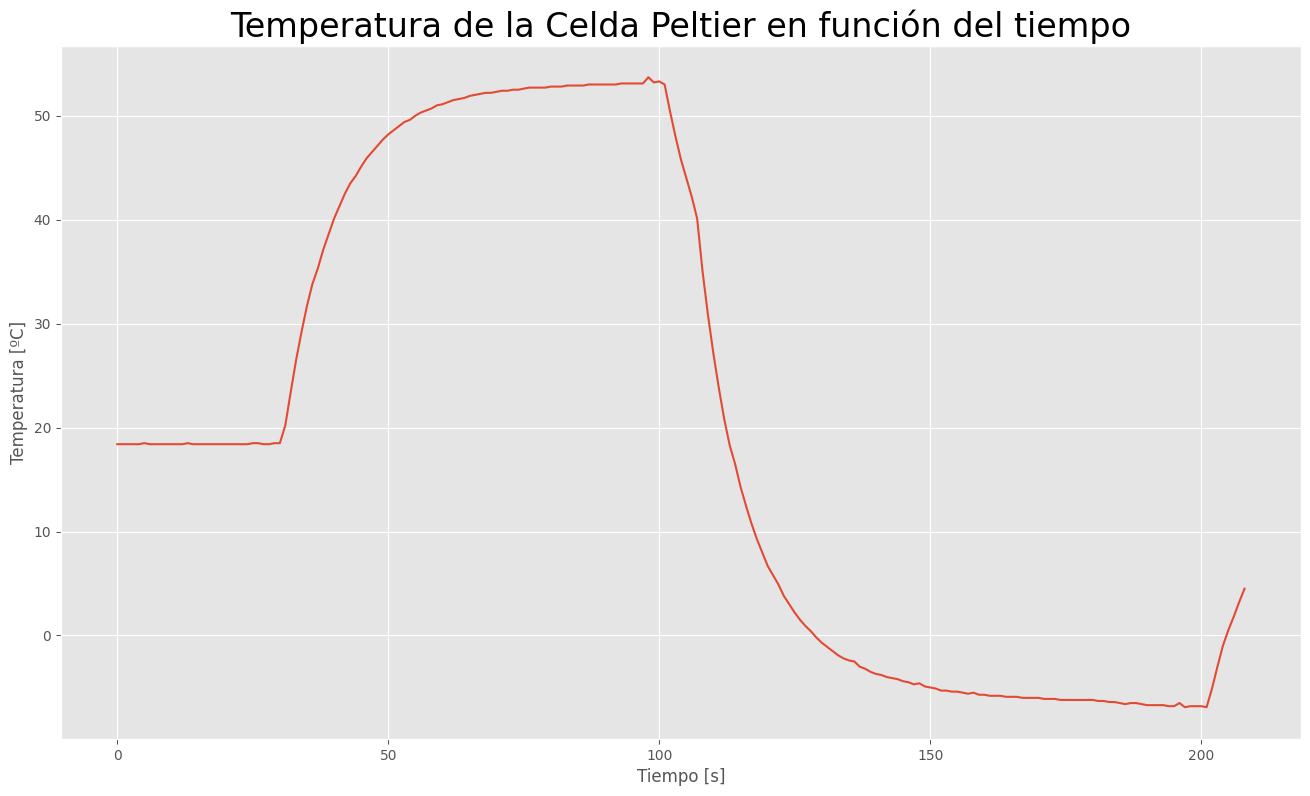

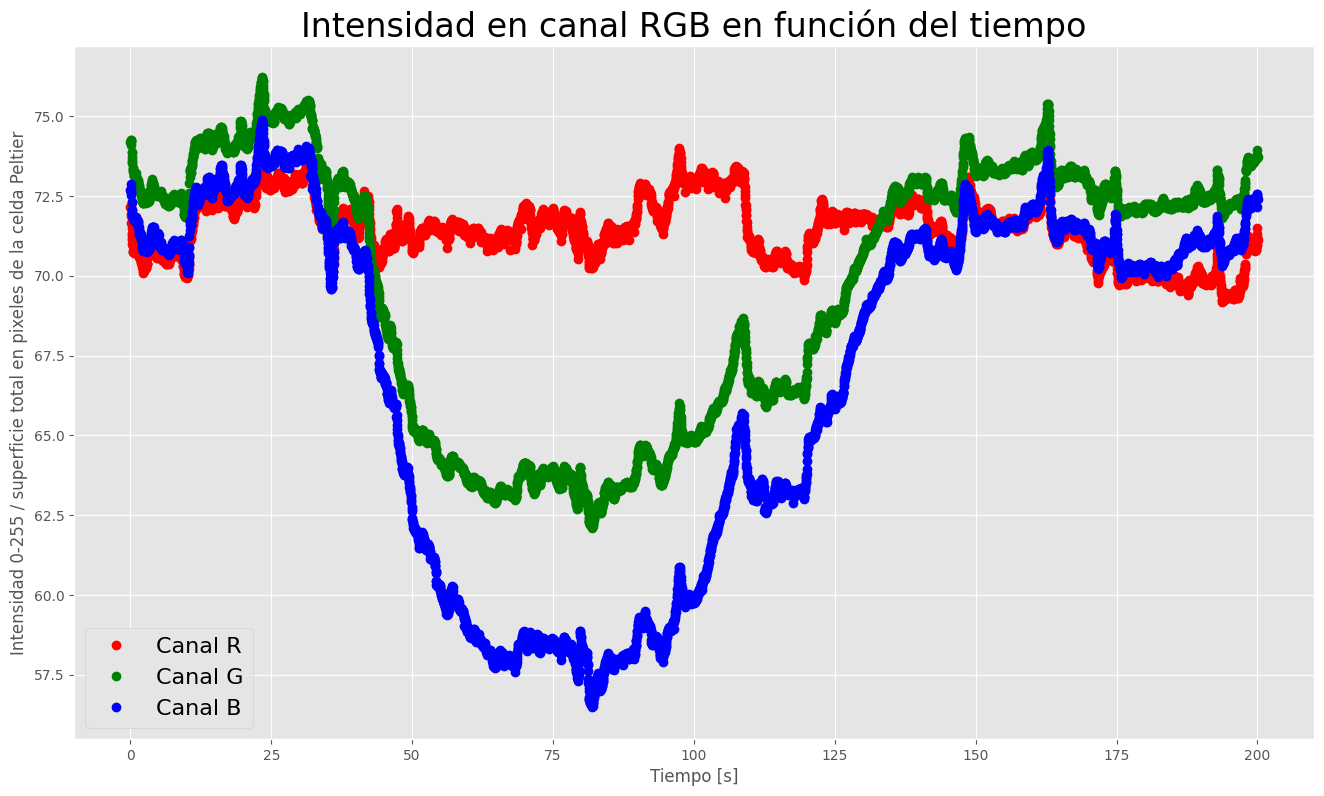

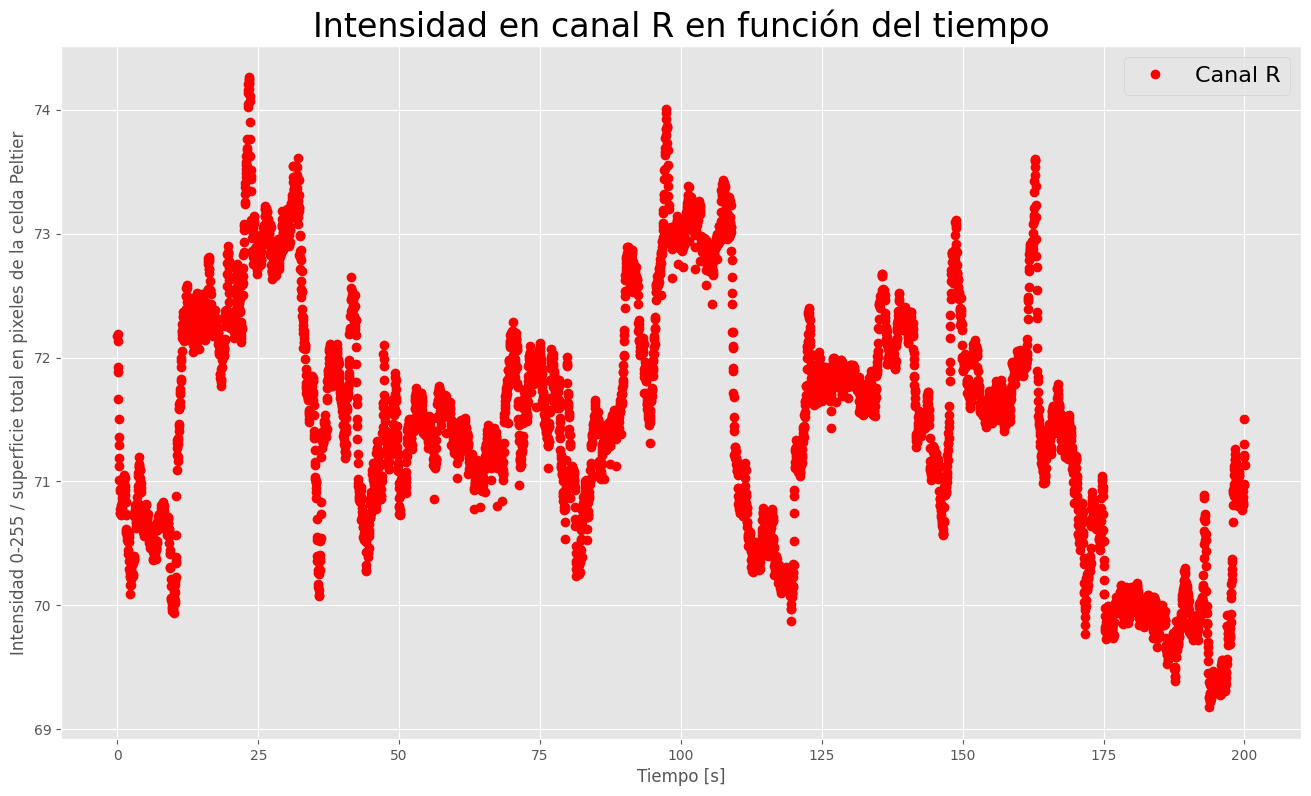

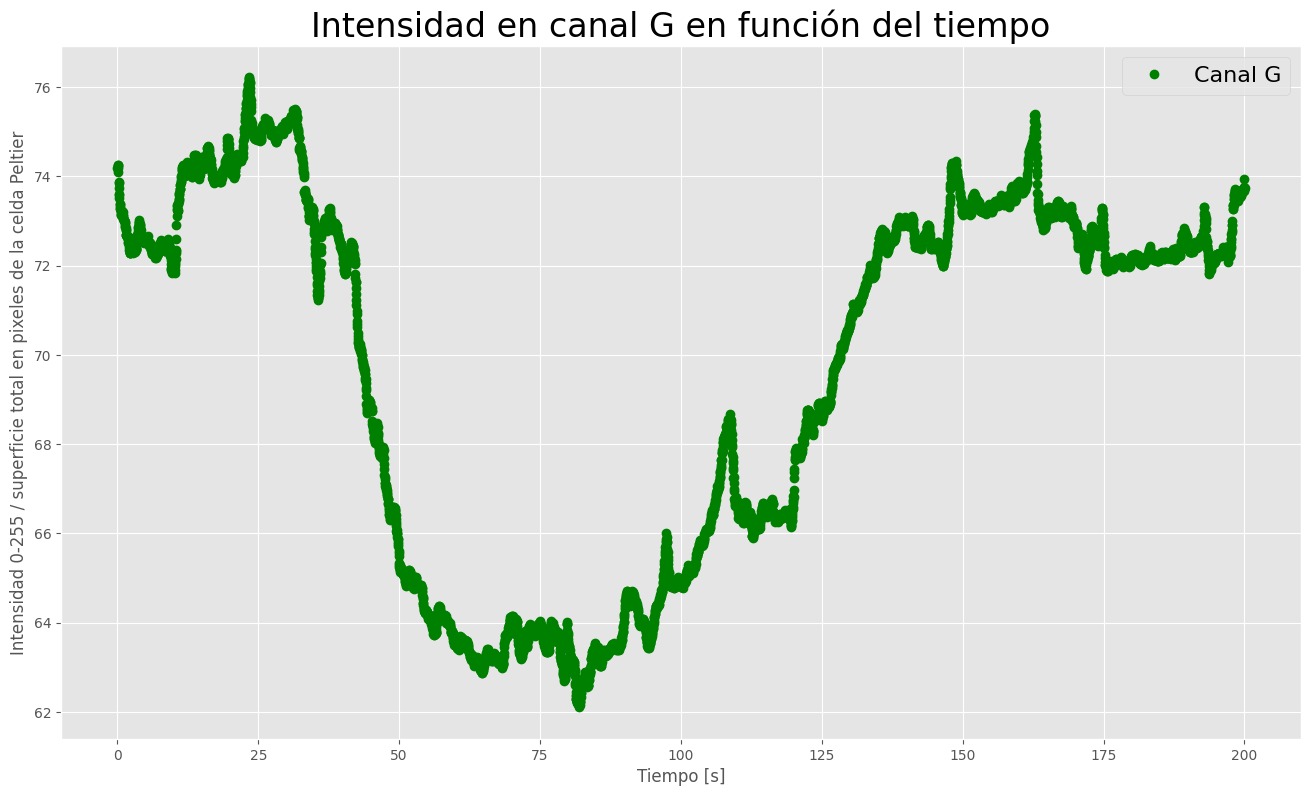

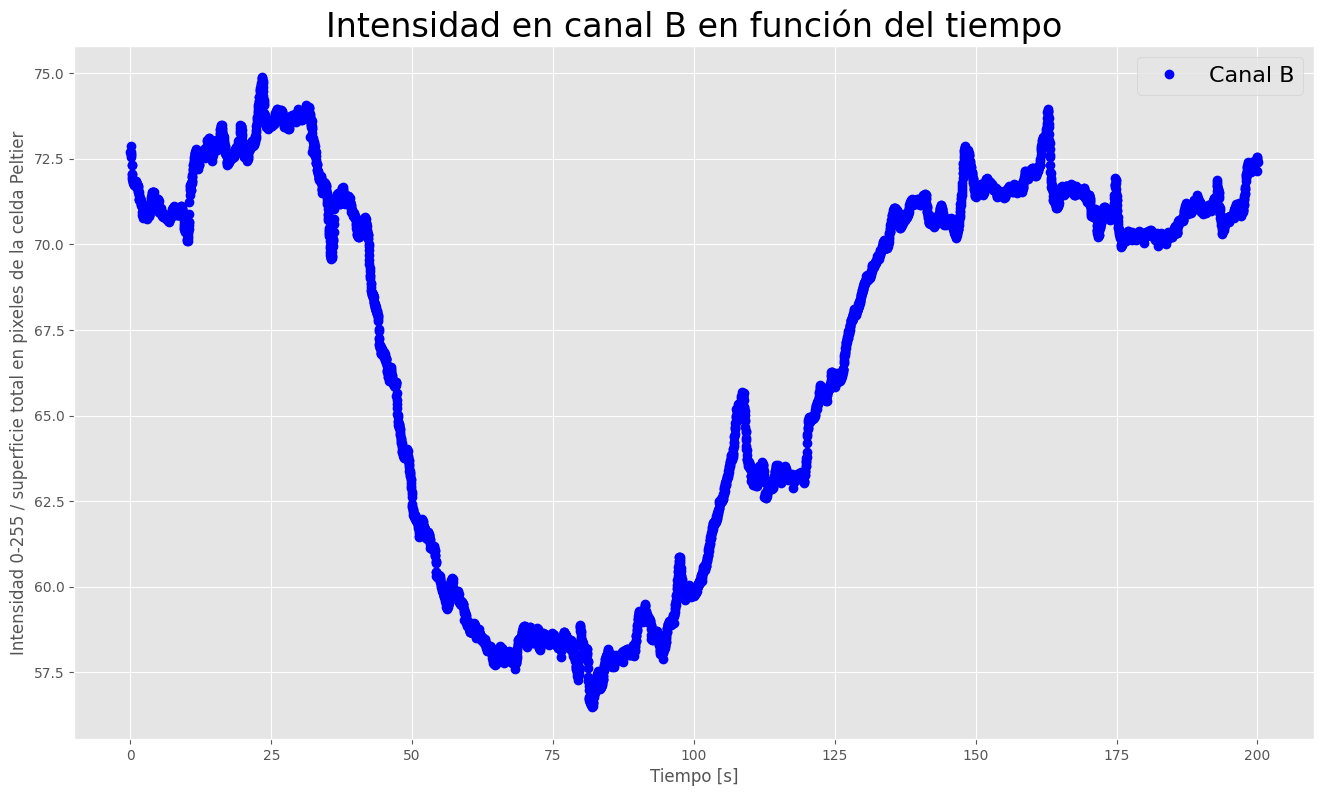

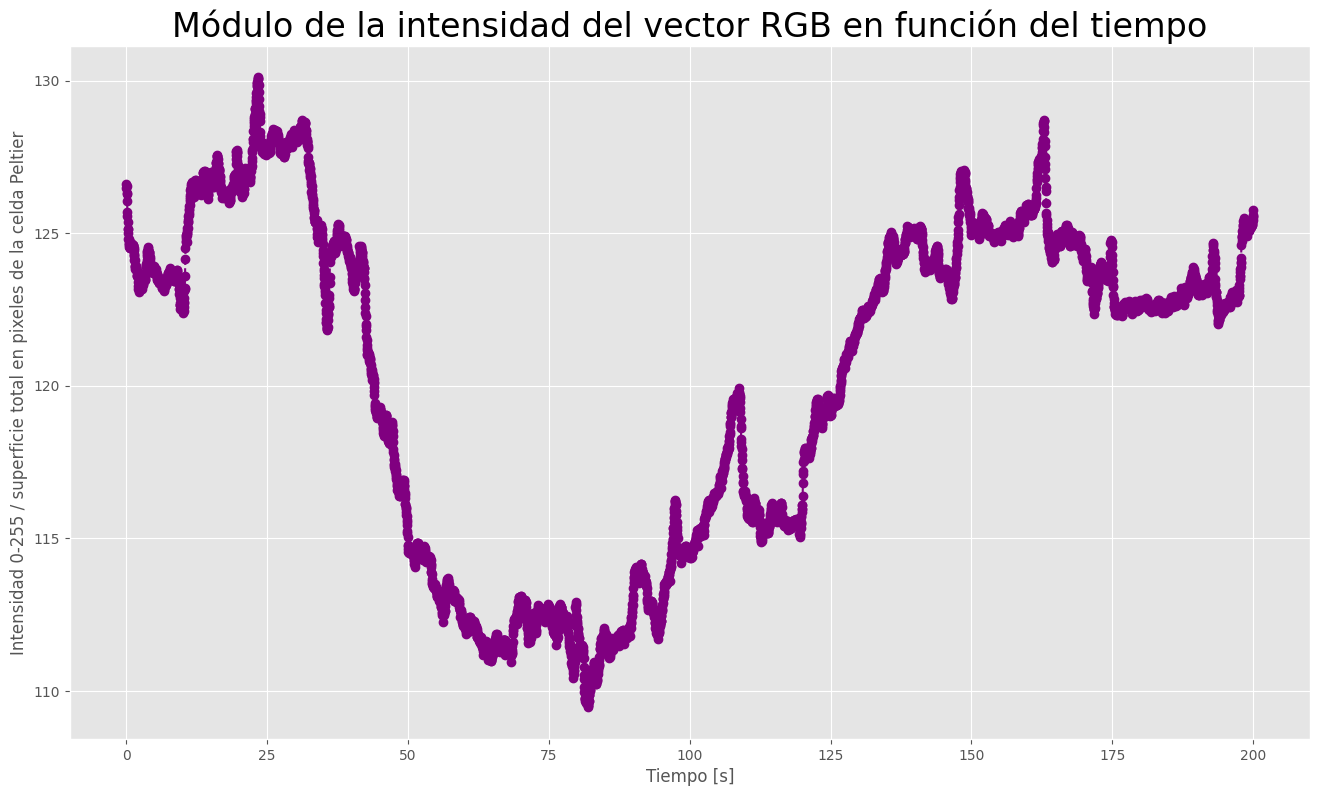

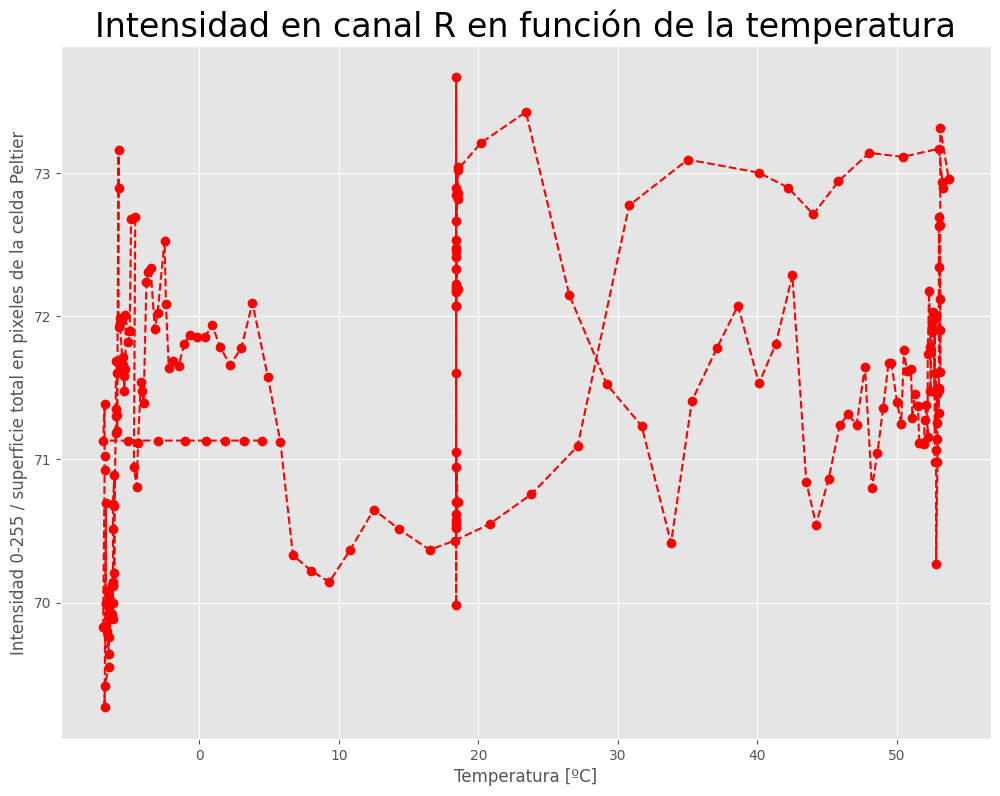

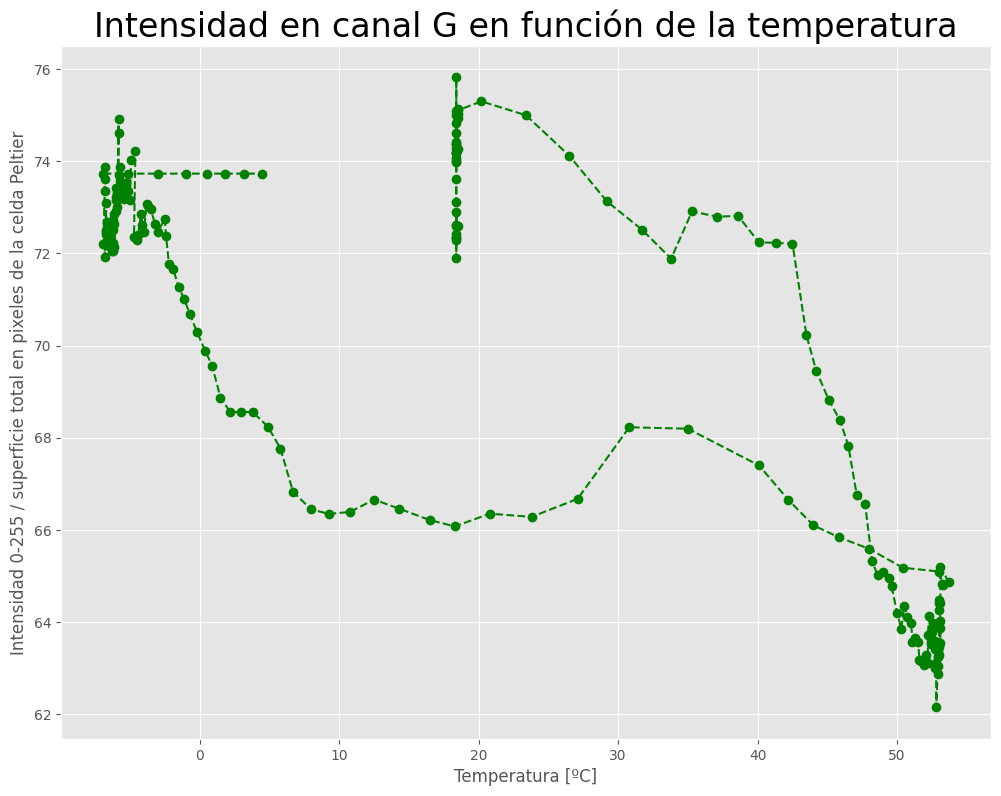

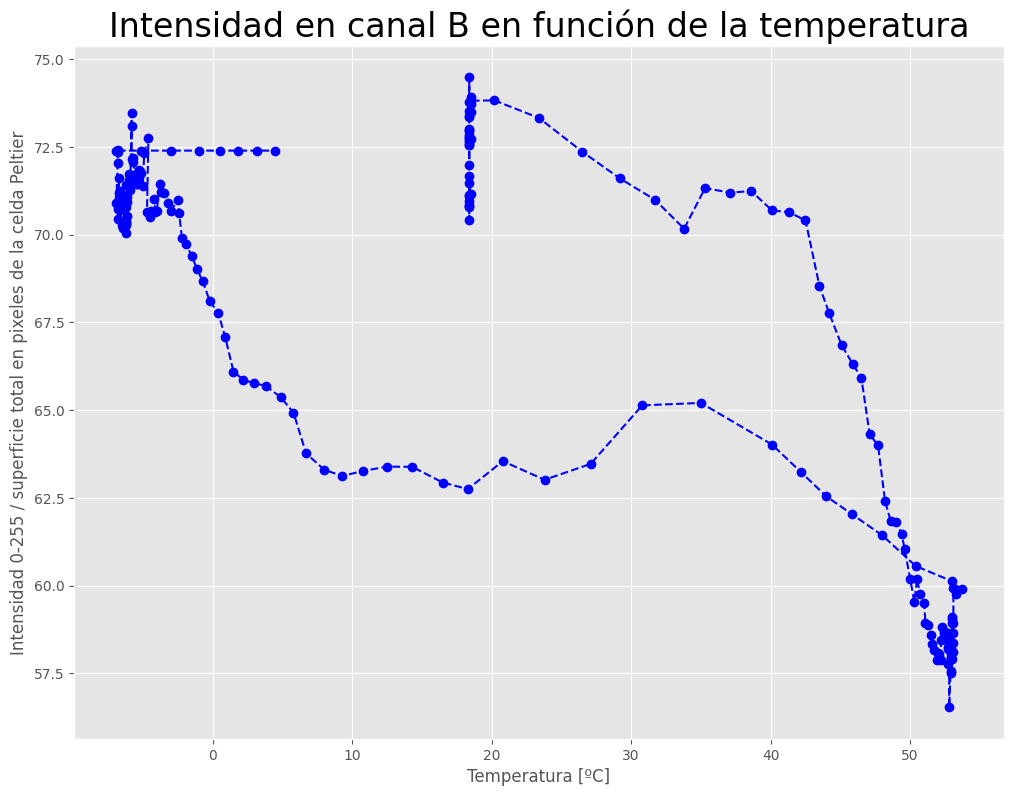

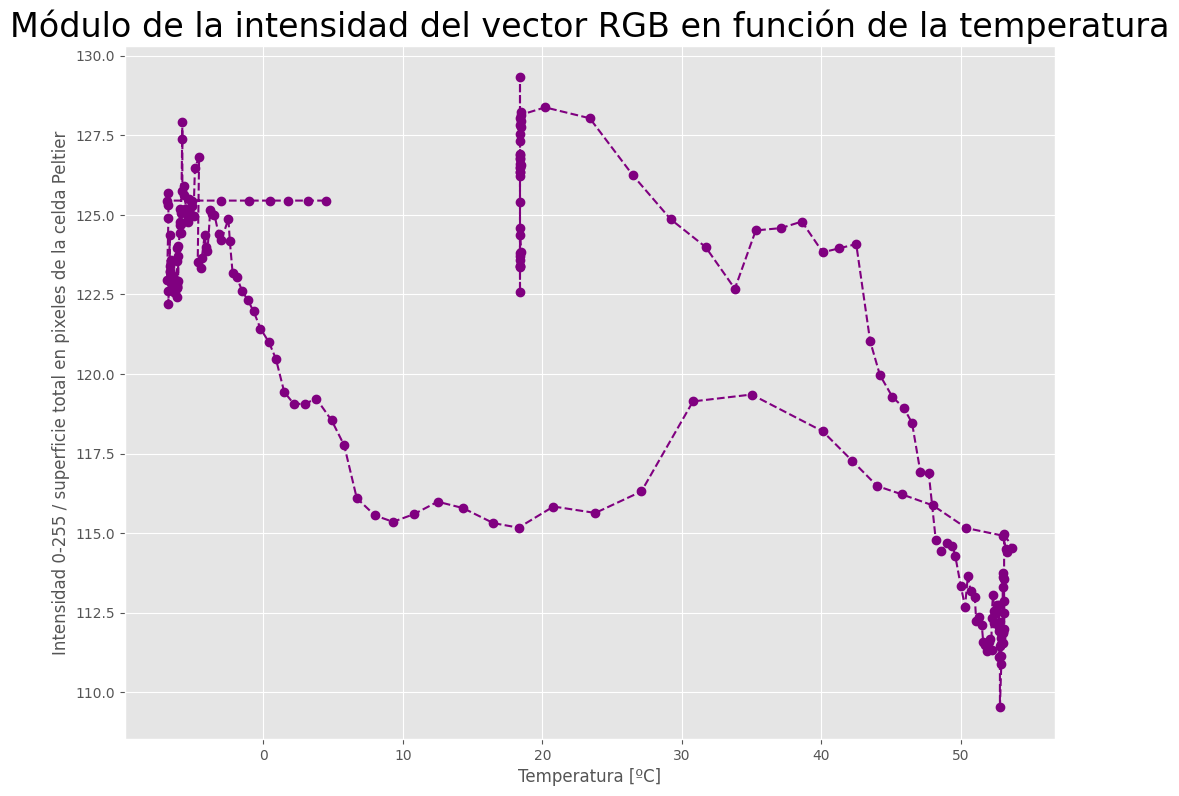

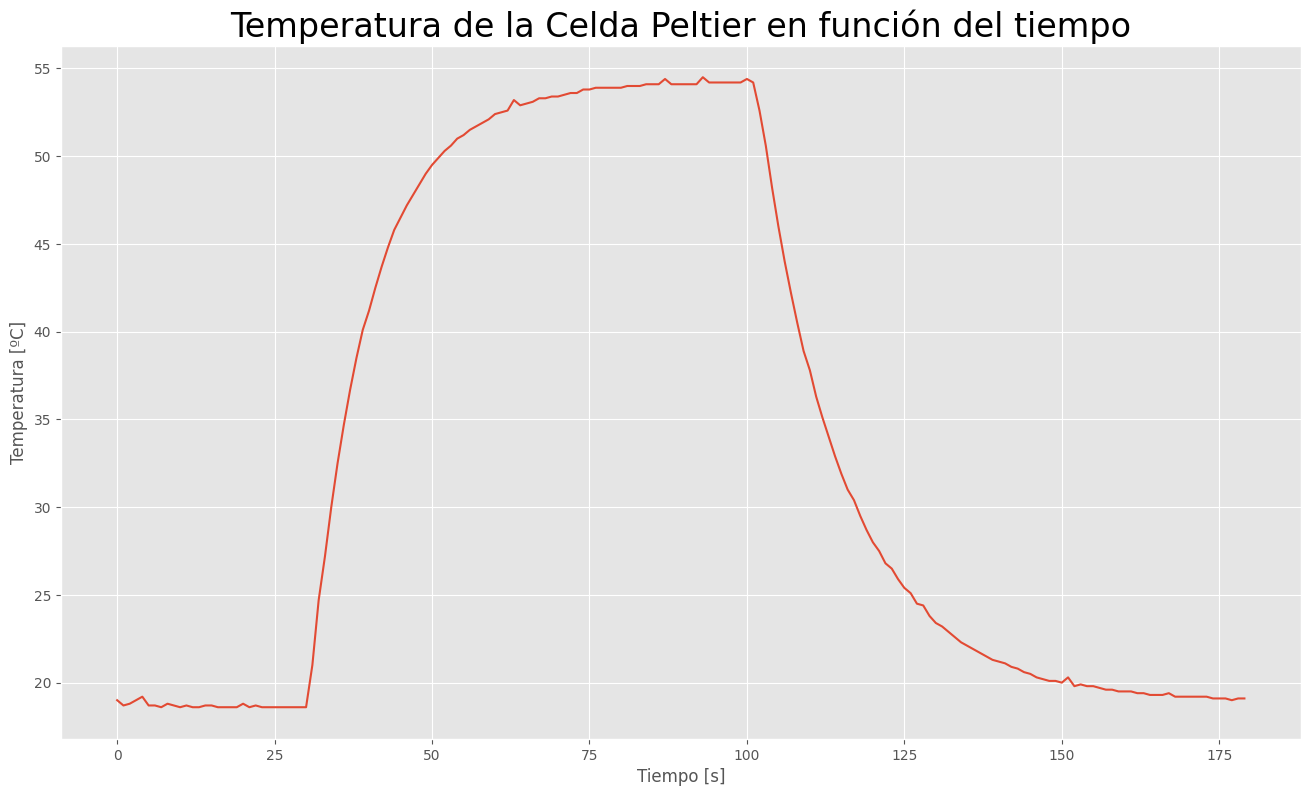

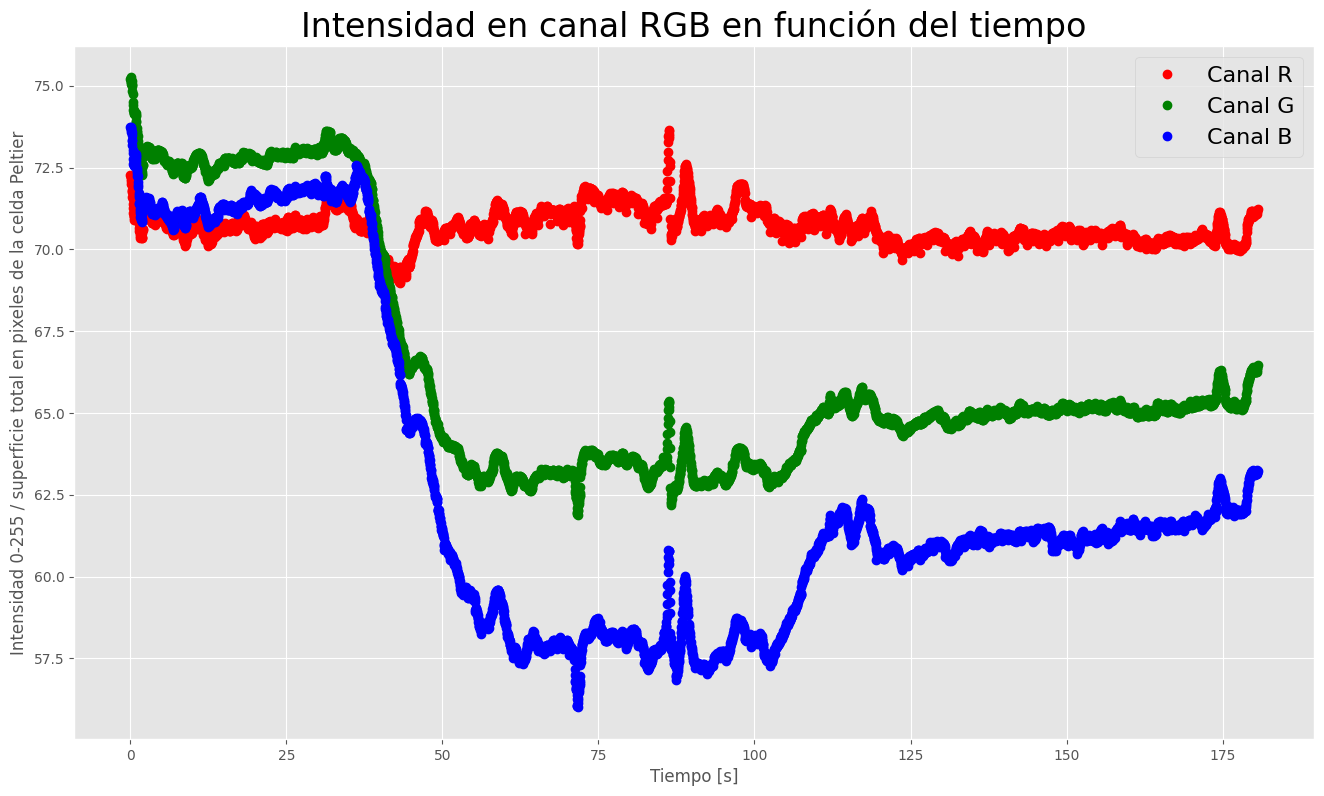

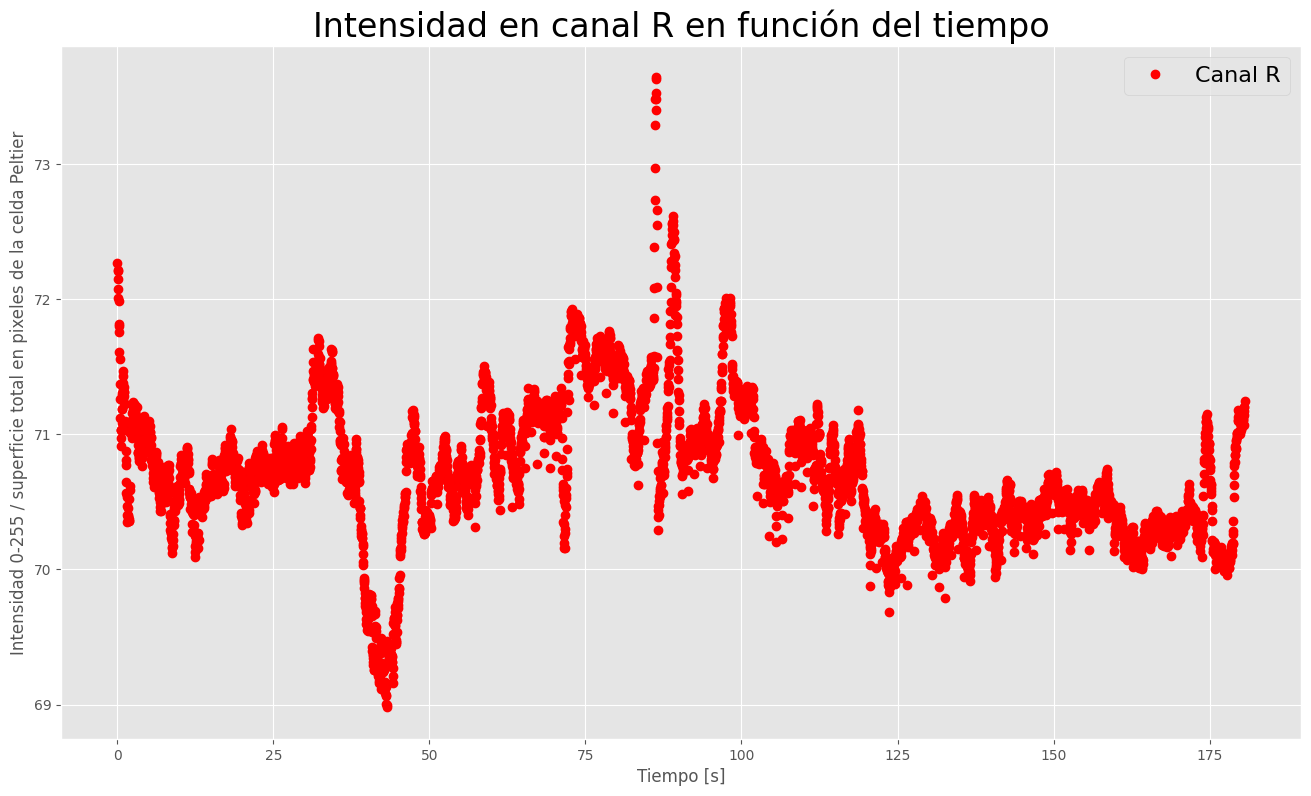

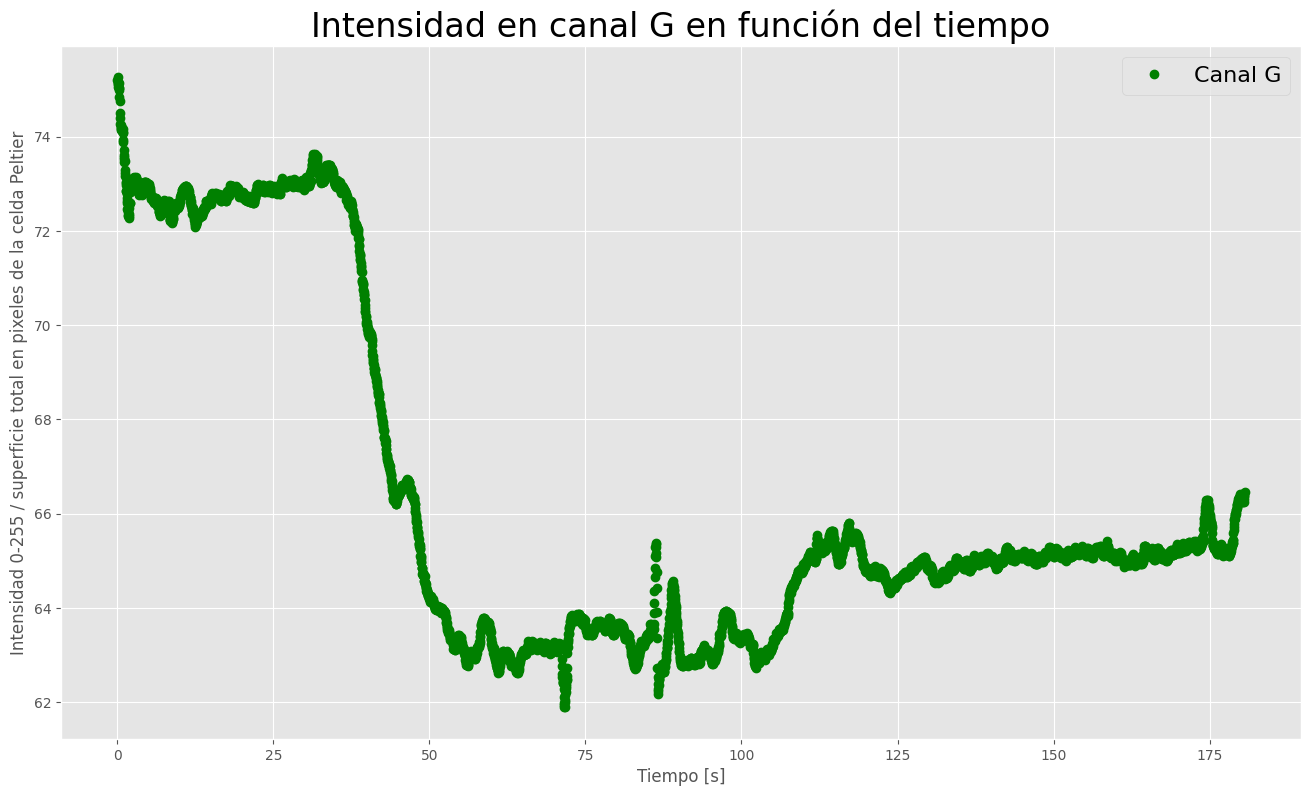

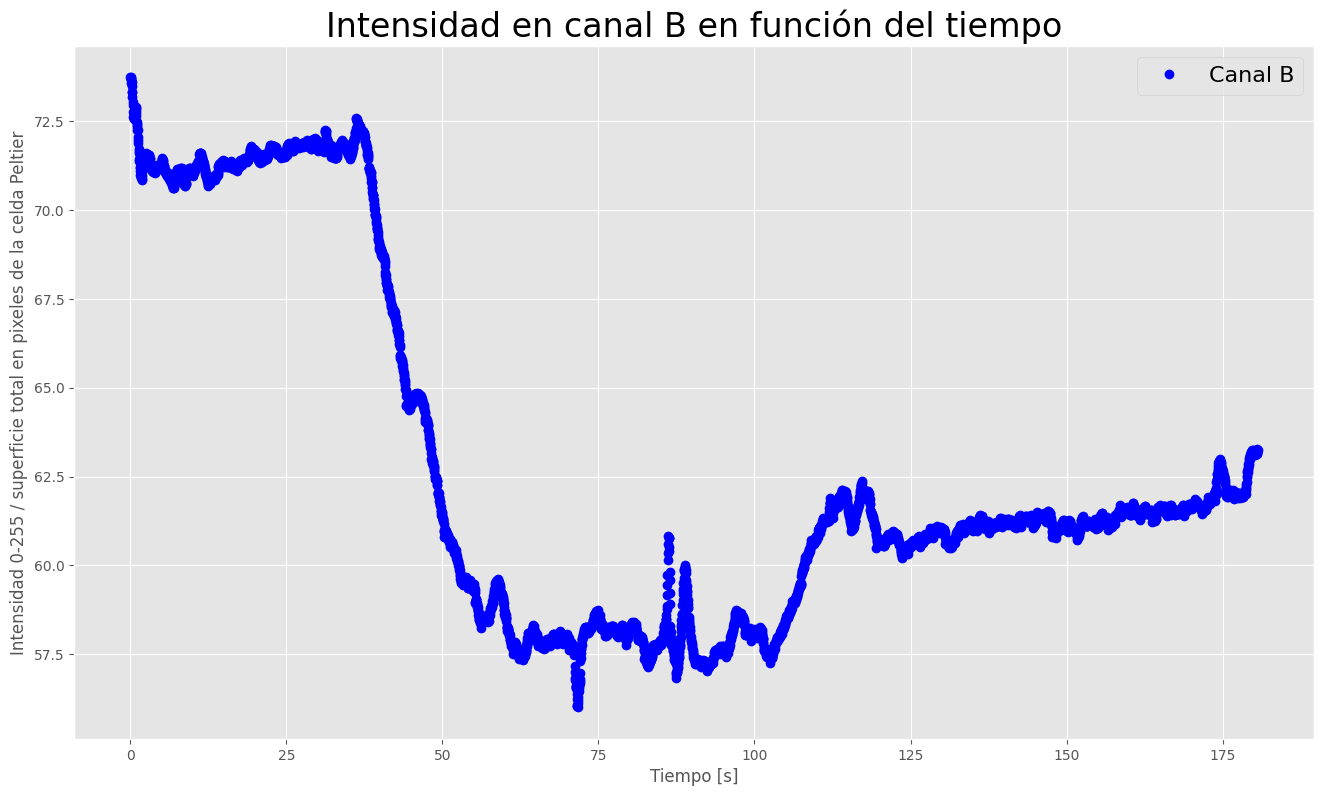

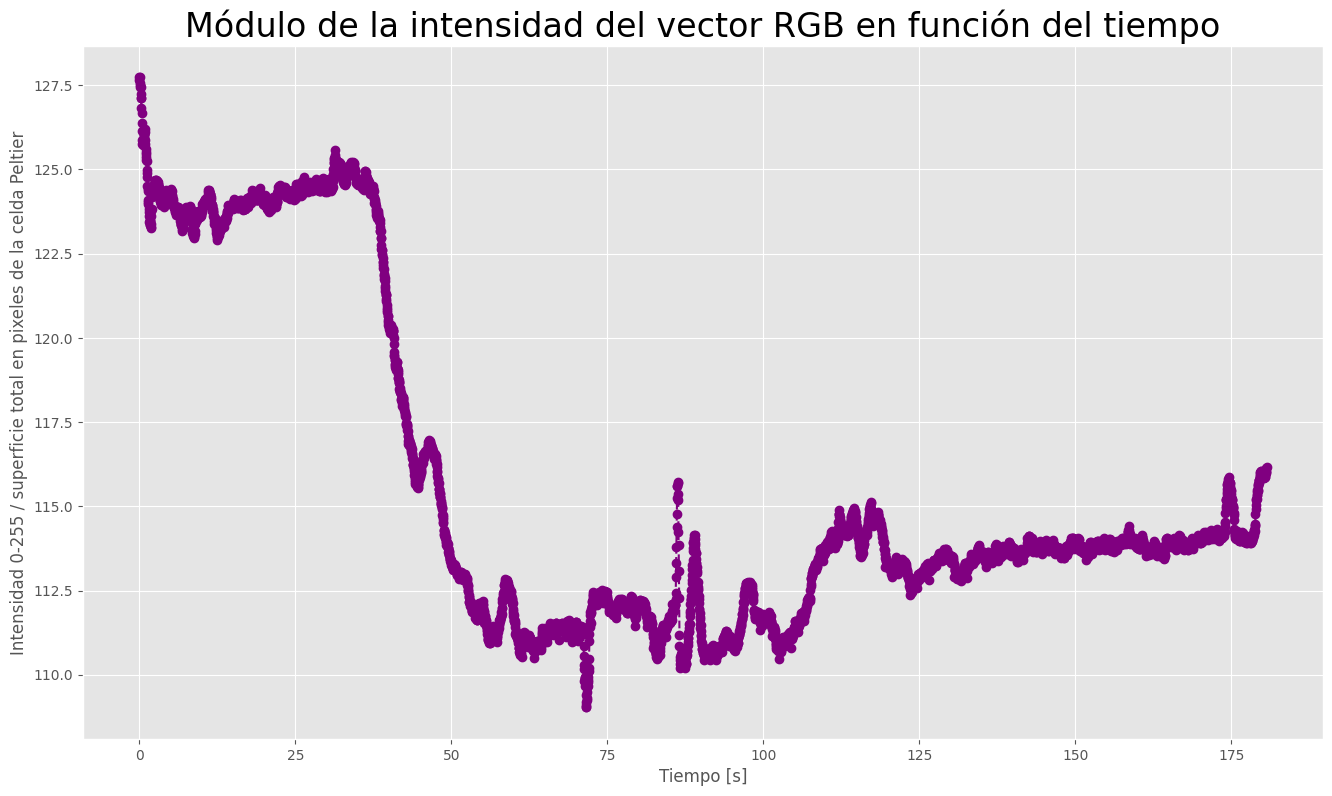

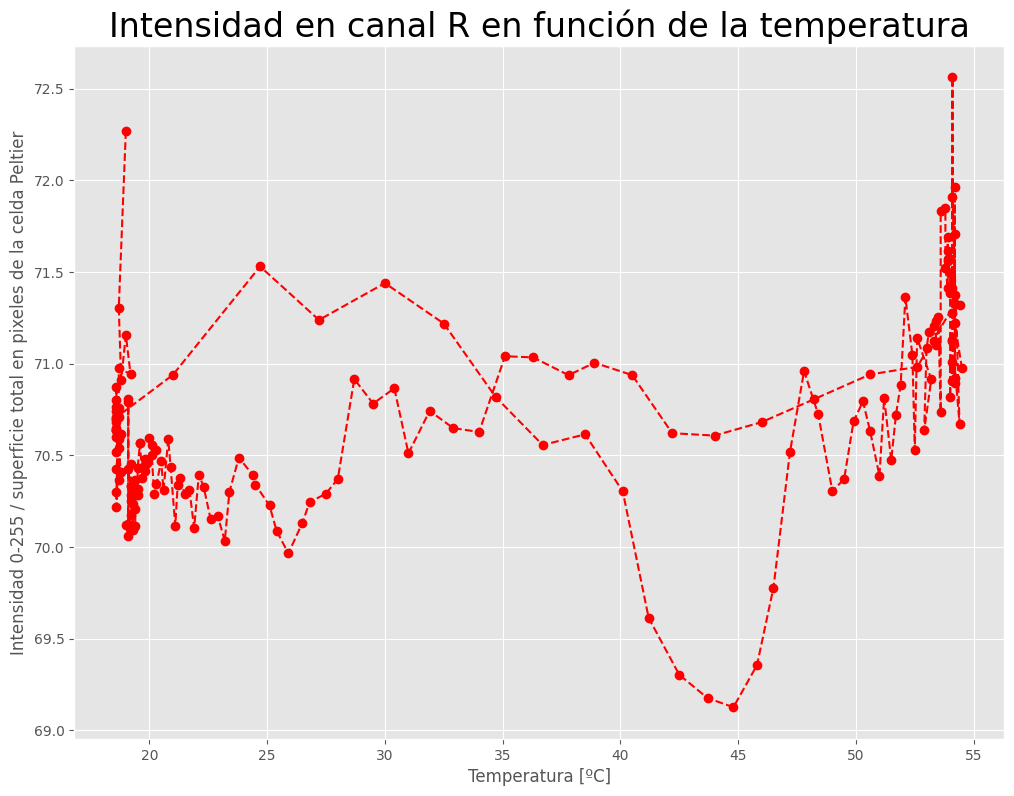

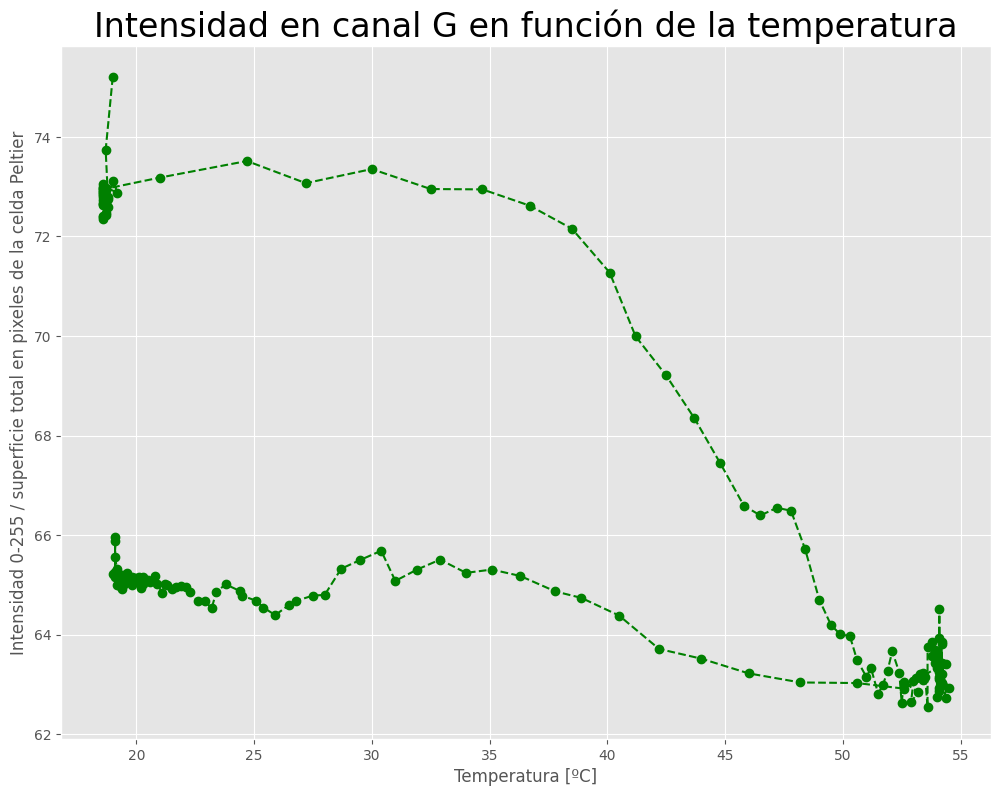

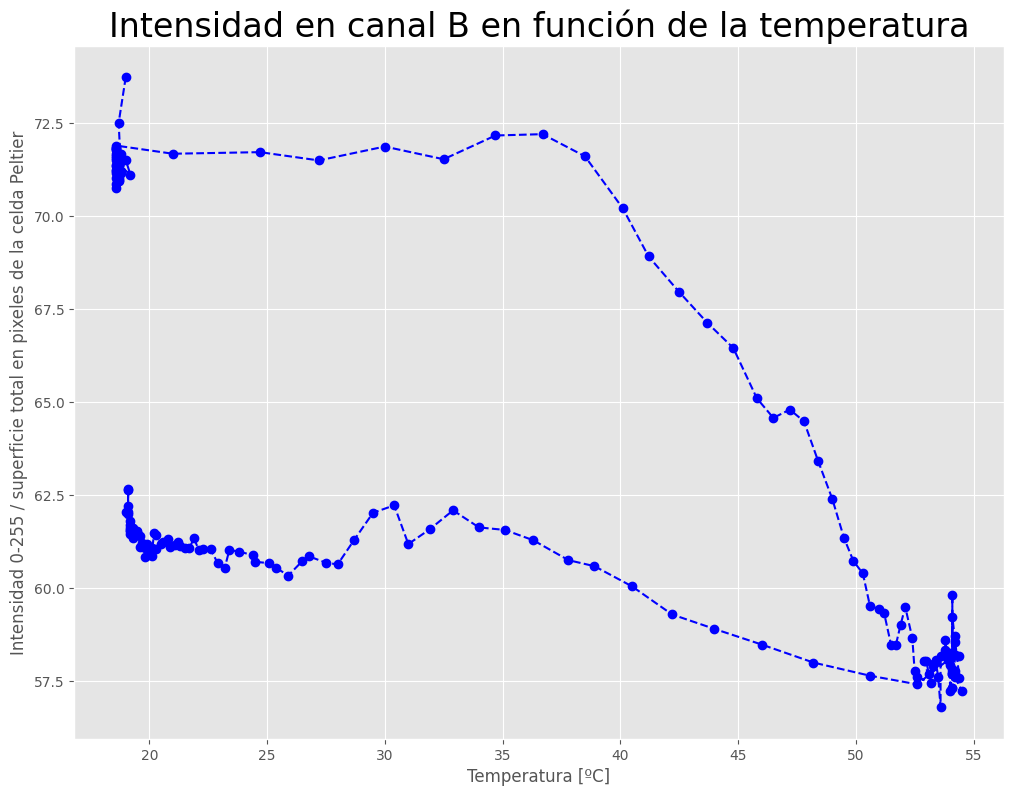

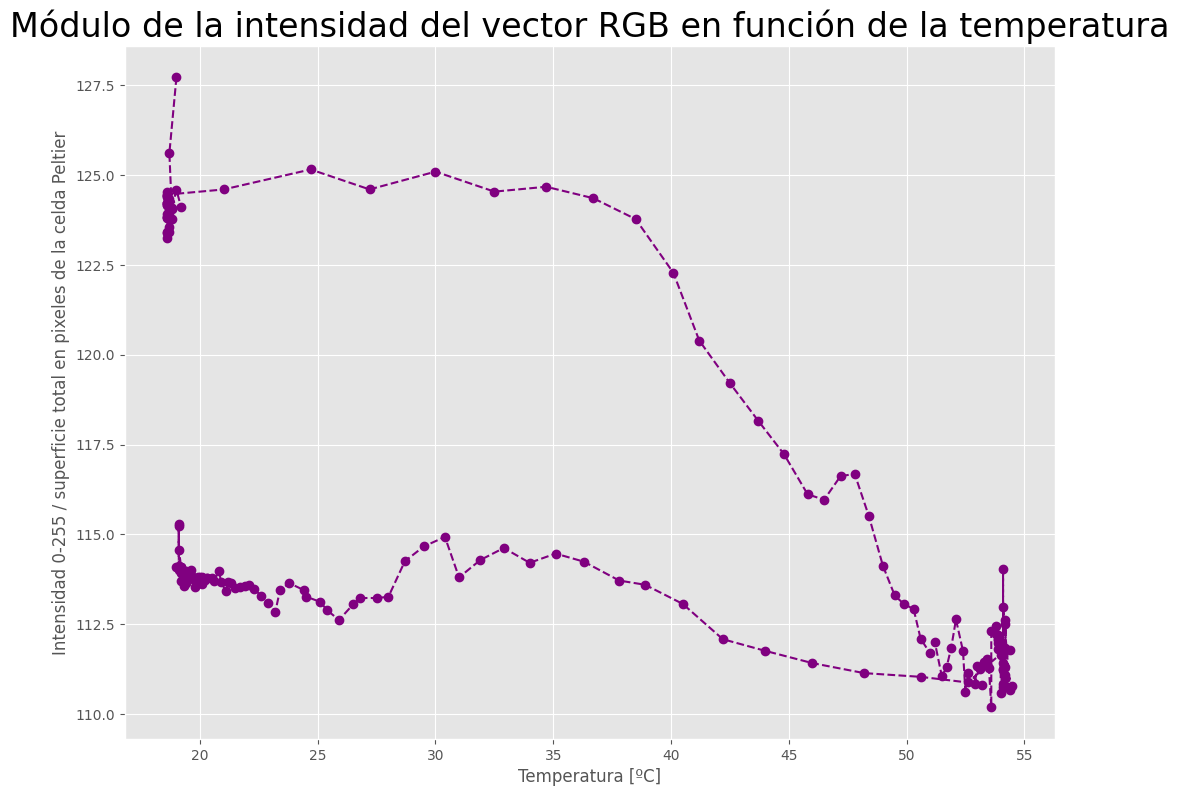

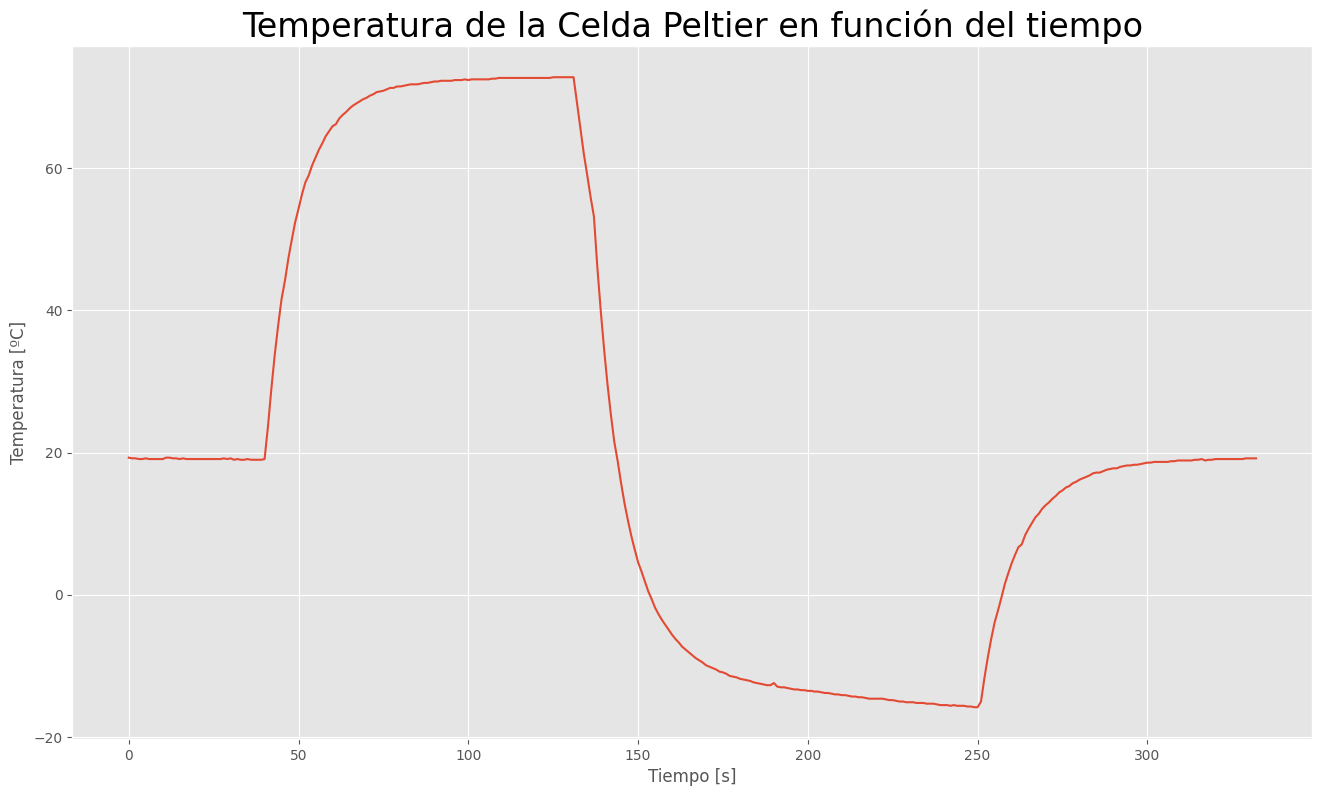

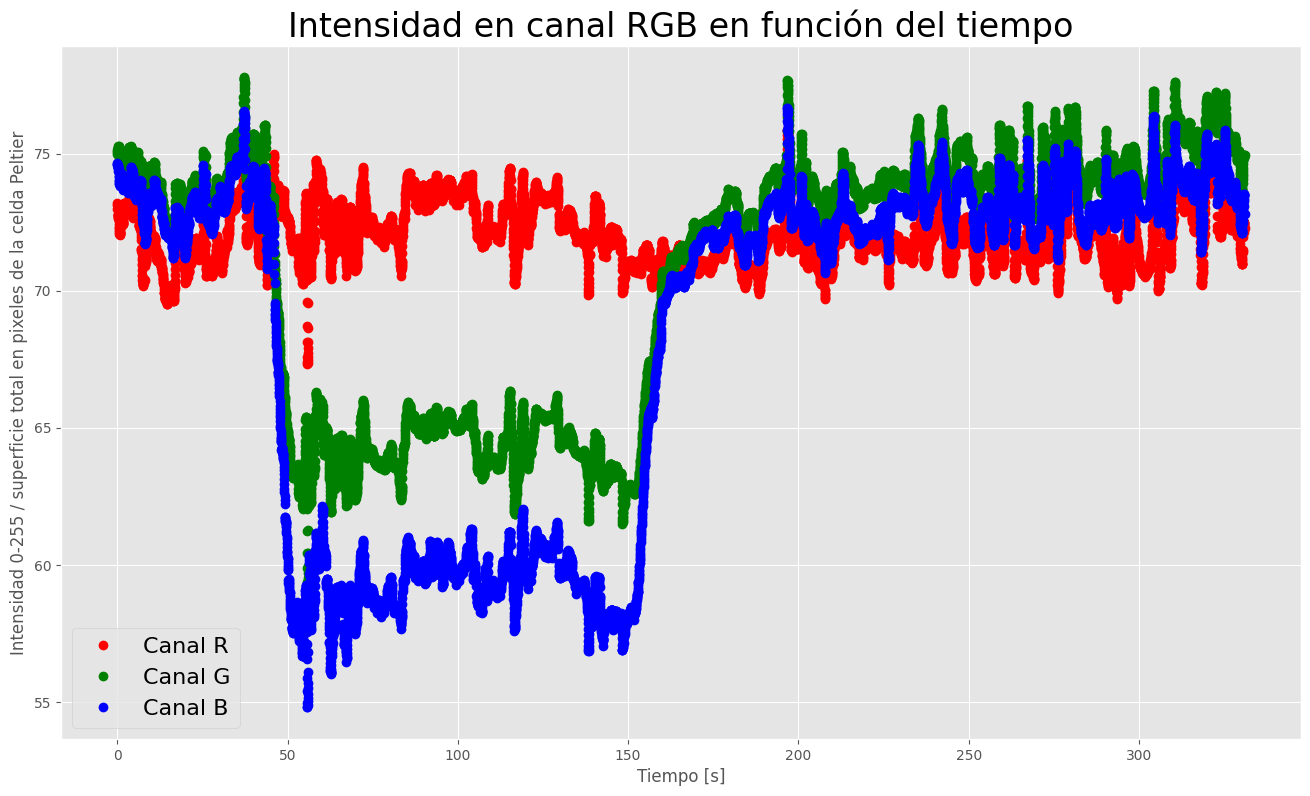

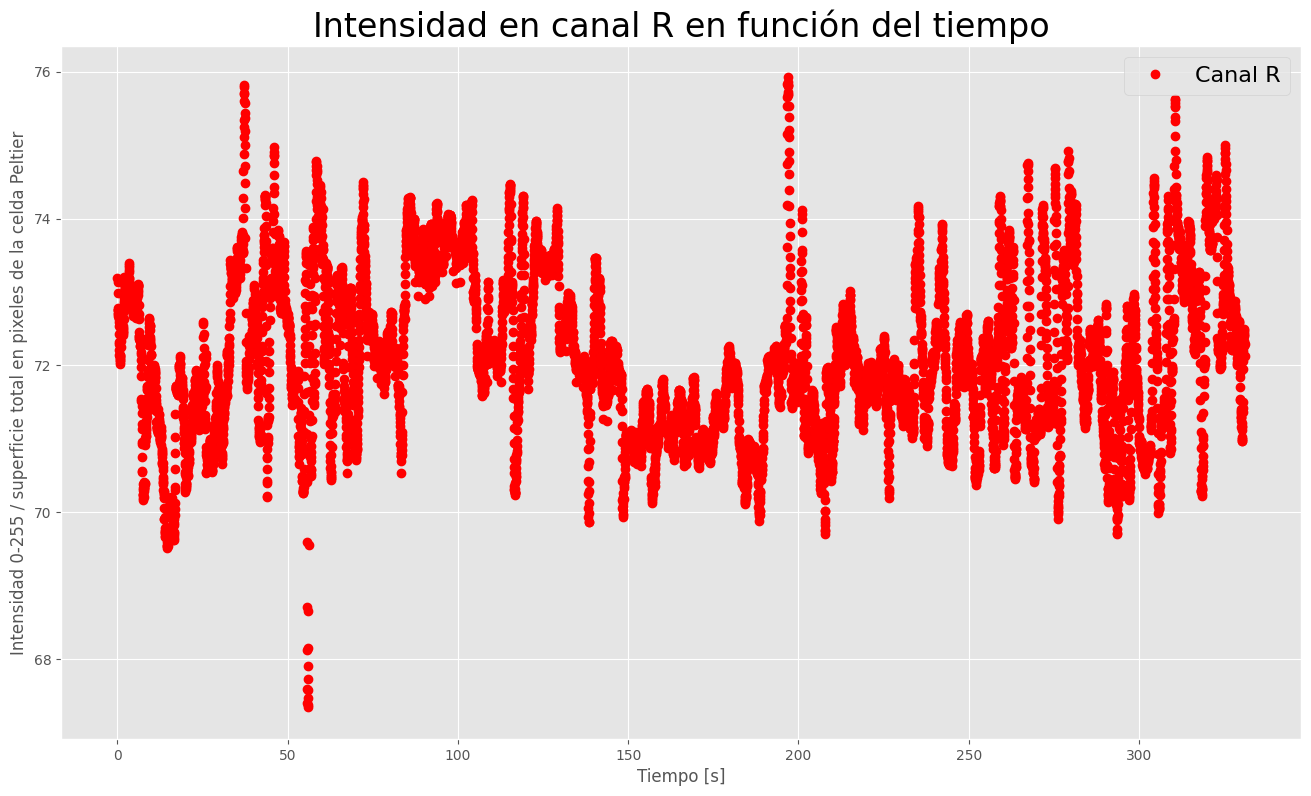

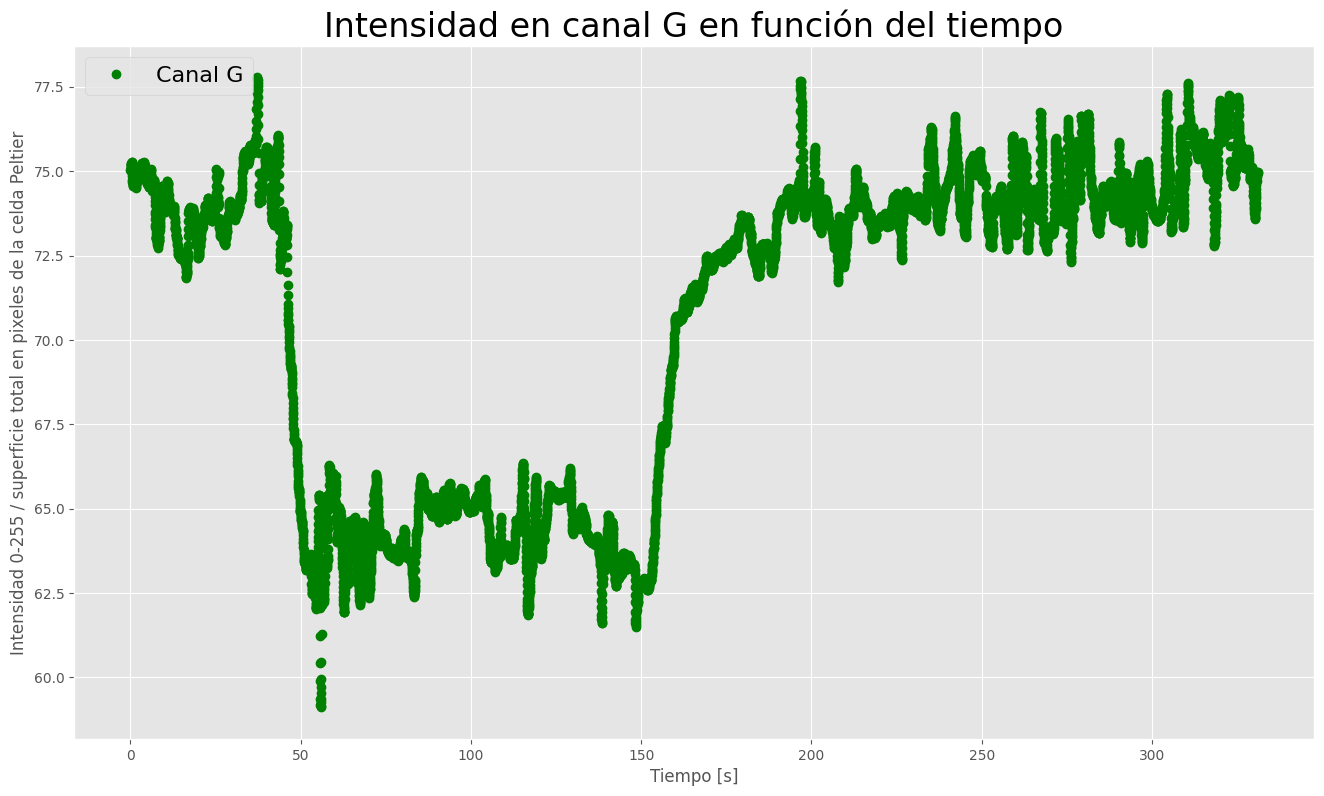

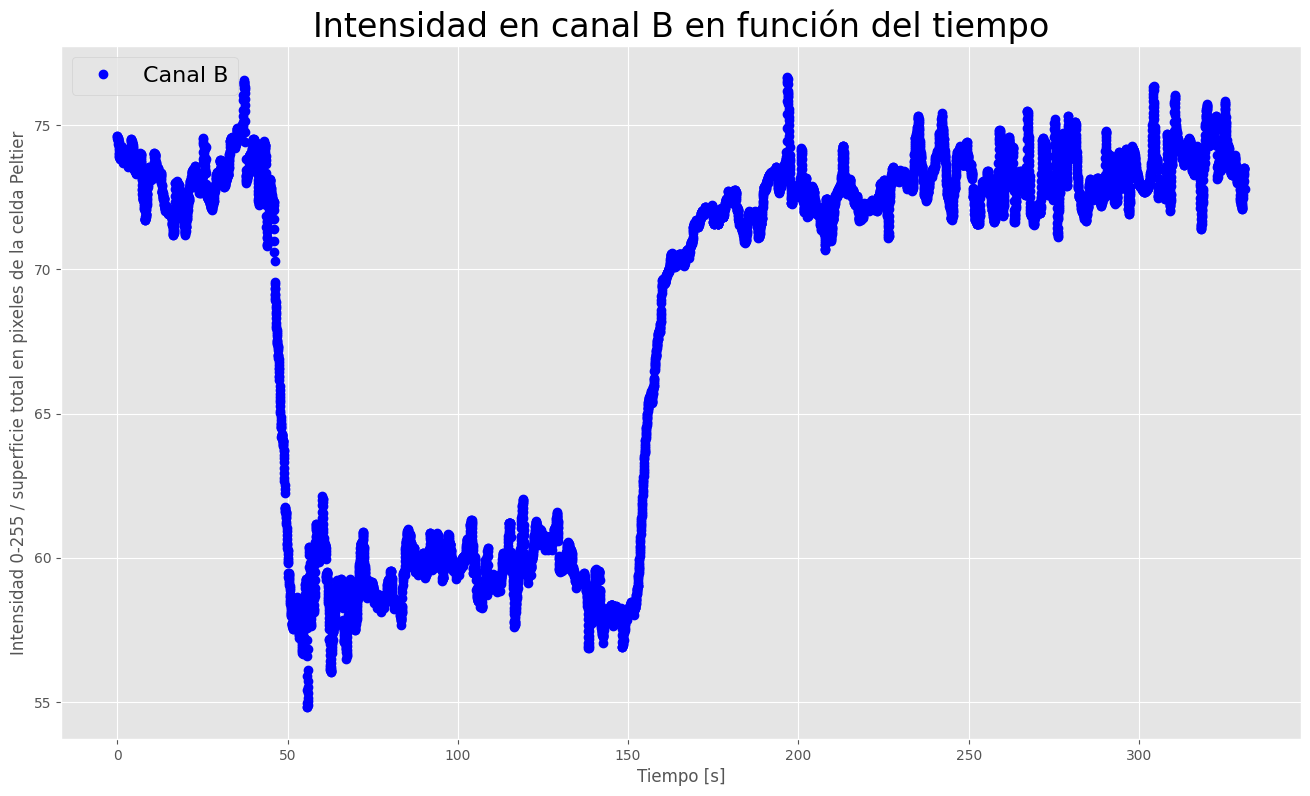

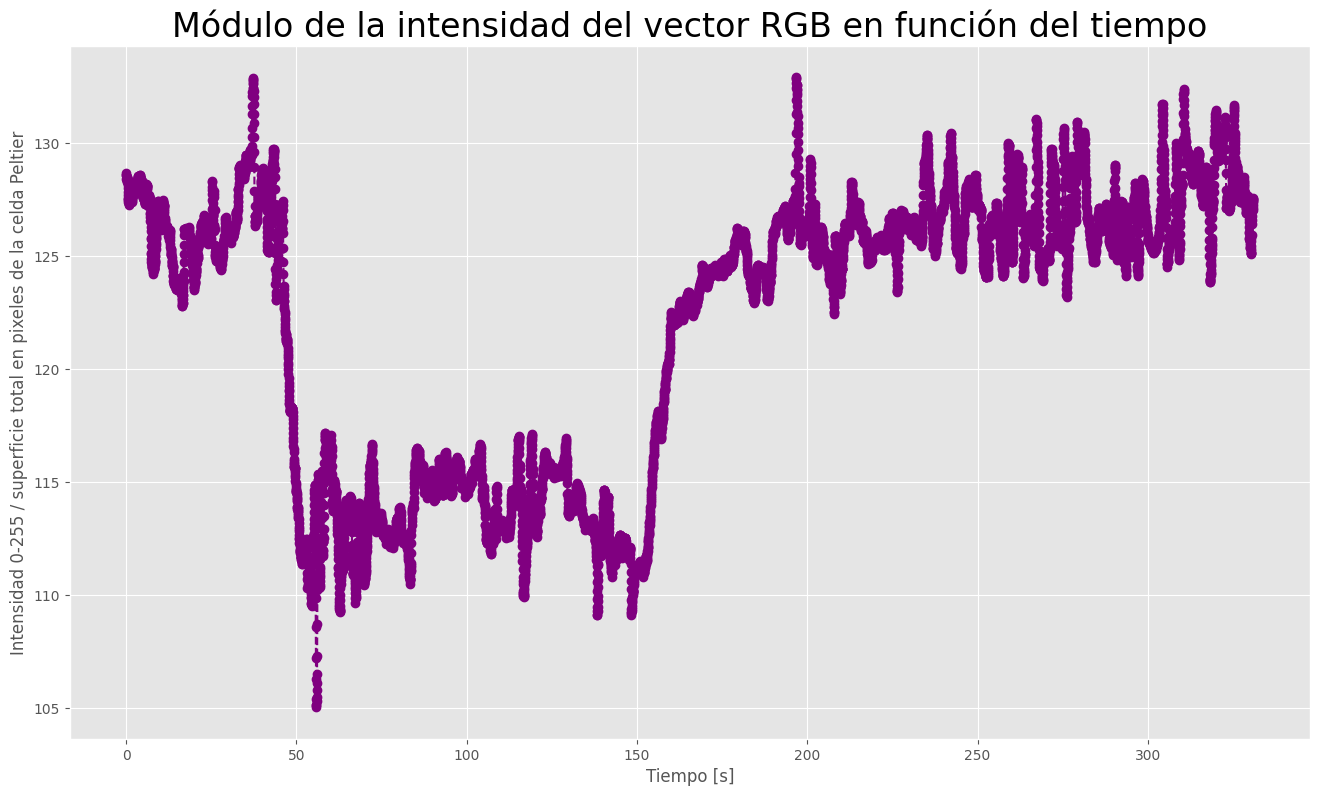

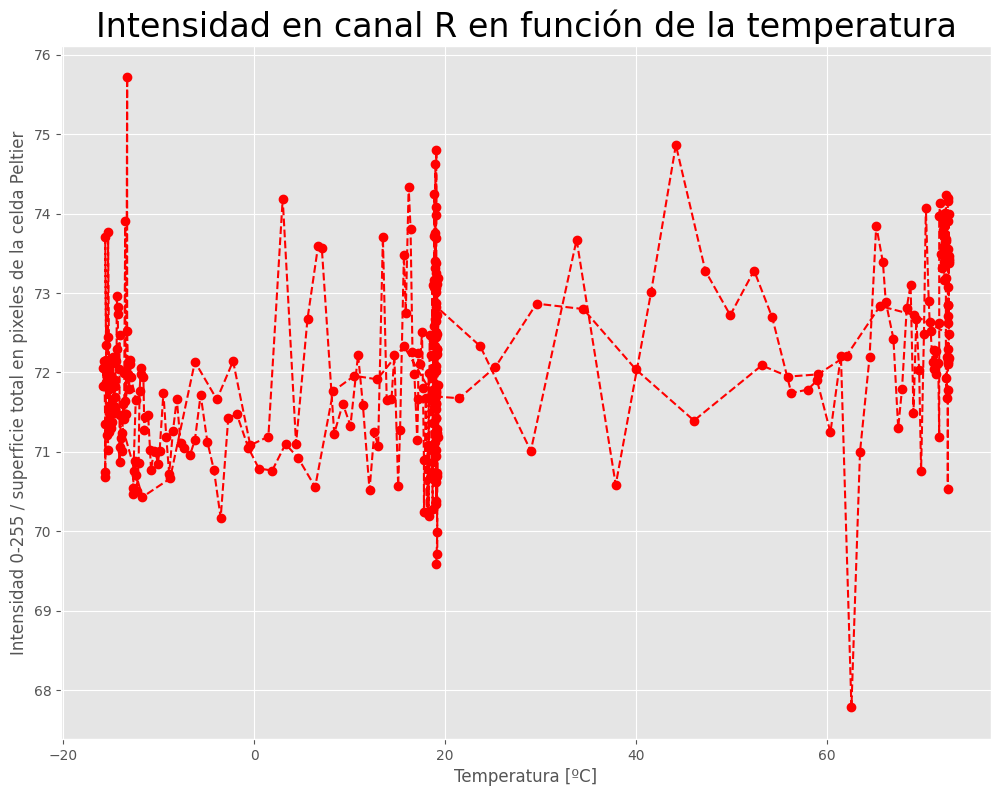

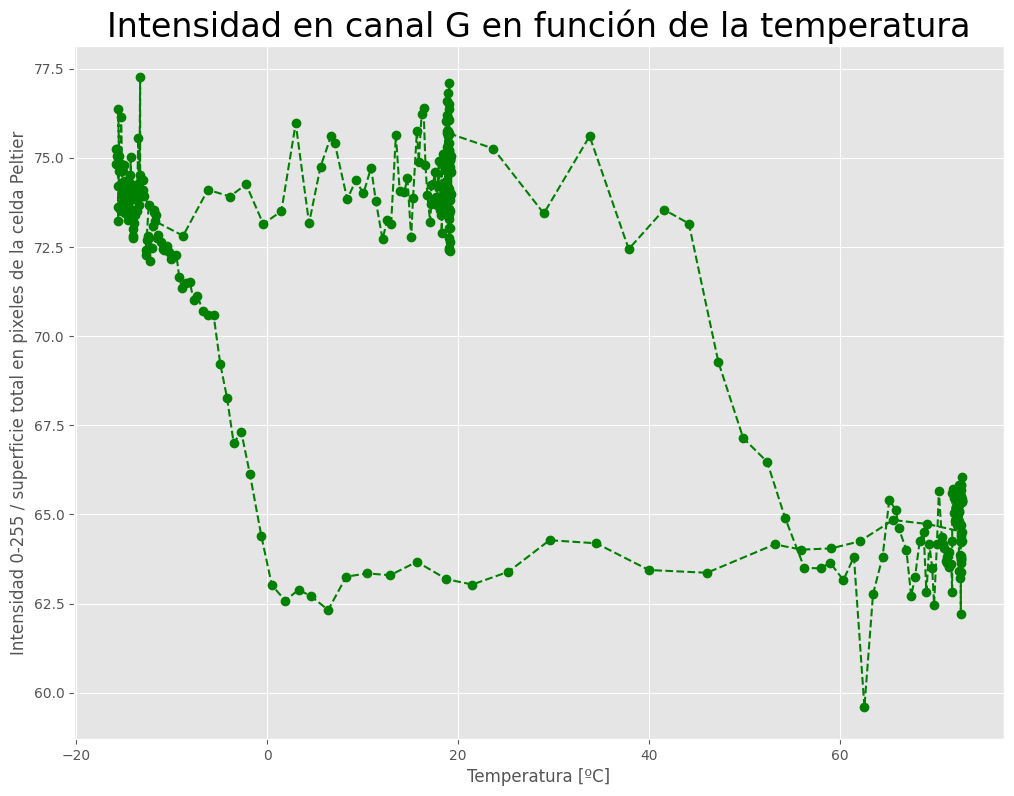

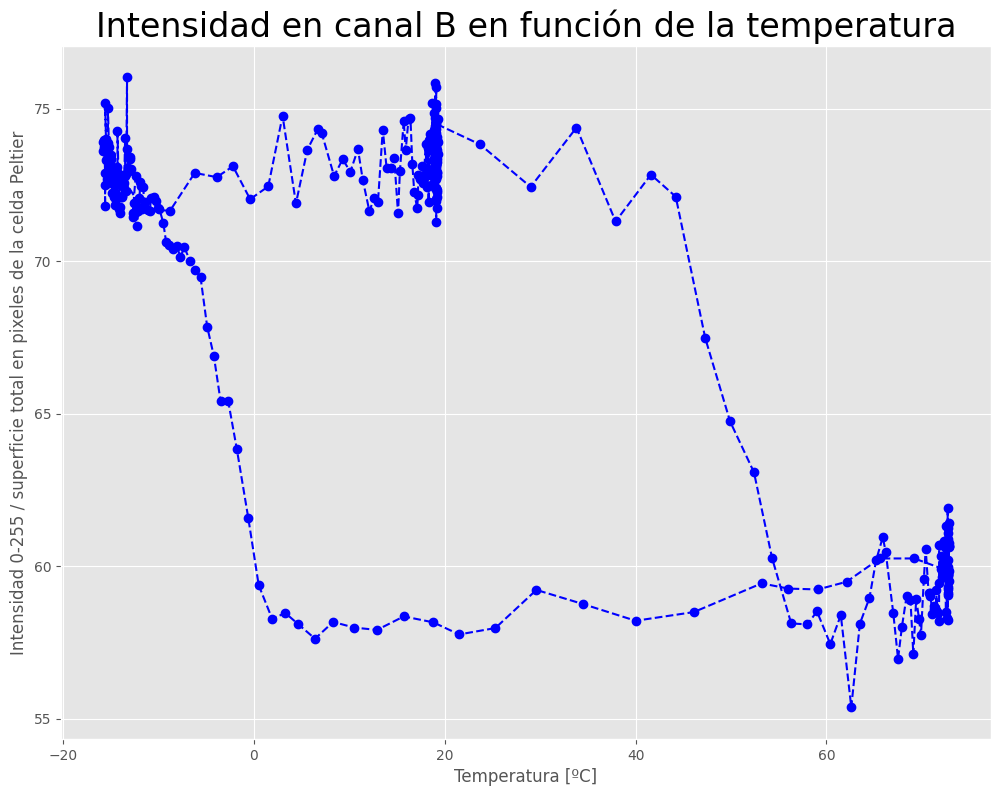

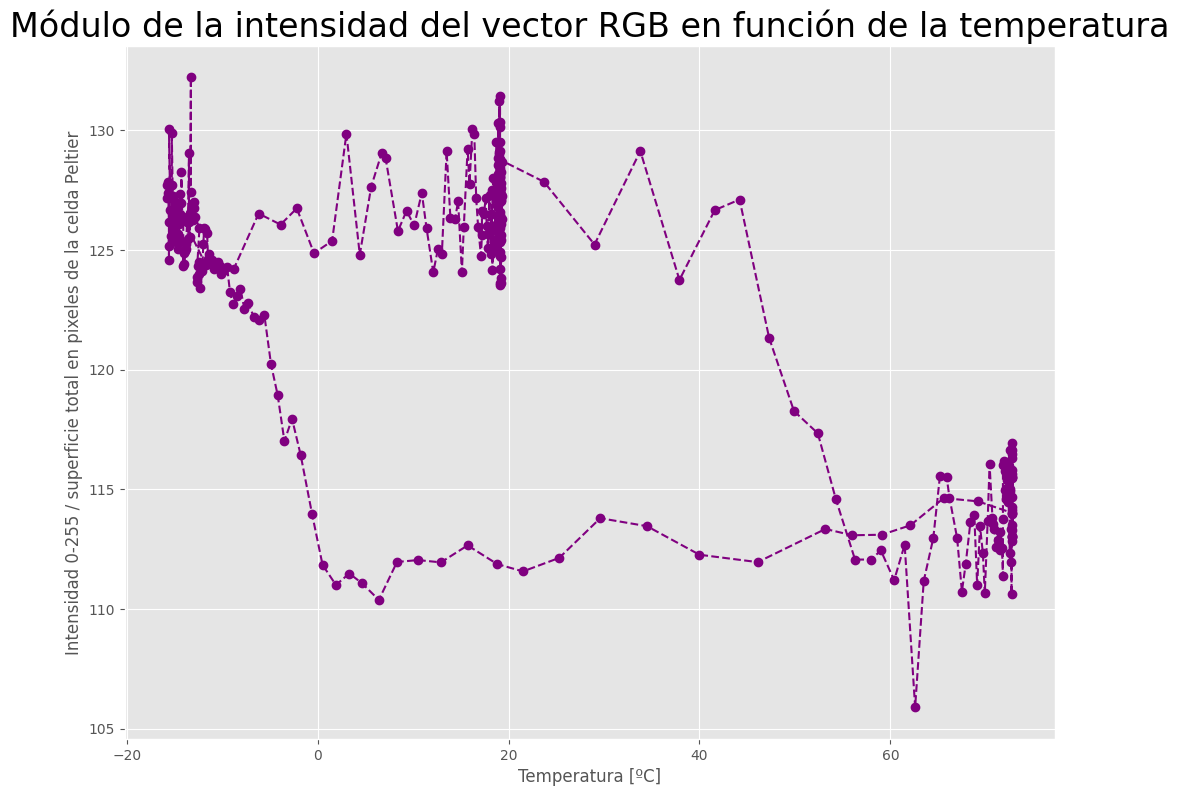

In [3]:
low=2
high=4
dashdash='--'
for k in range(low,high+1):
    df=pd.read_csv(f'peltier_cosas/peltiermod{k}.csv')

    t=np.array(range(len(df)))

    plt.figure(figsize=(16,9))
    plt.title('Temperatura de la Celda Peltier en función del tiempo',fontsize=24)
    plt.plot(t,df['temp'])
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Temperatura [ºC]')
    plt.savefig(f'graficos/video{k}_tiempo_temperatura.png', bbox_inches='tight', dpi=150)

    df_video=pd.read_csv(f'procesados/video{k}_rgb_sliced.csv')
    intensidad=(df_video['r']**2+df_video['g']**2+df_video['b']**2)**.5

    plt.figure(figsize=(16,9))
    for i in ['r','g','b']:
        plt.plot(df_video['t'],df_video[i],f'{i}o', label=f'Canal {i.upper()}')
        plt.title('Intensidad en canal RGB en función del tiempo',fontsize=24)
        plt.xlabel('Tiempo [s]')
        plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')
        plt.legend(fontsize=16)
    plt.savefig(f'graficos/video{k}_tiempo_tricolor.png', bbox_inches='tight', dpi=150)
        

    for i in ['r','g','b']:
        plt.figure(figsize=(16,9))
        plt.title(f'Intensidad en canal {i.upper()} en función del tiempo',fontsize=24)
        plt.plot(df_video['t'],df_video[i],f'{i}o', label=f'Canal {i.upper()}')
        plt.xlabel('Tiempo [s]')
        plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')
        plt.legend(fontsize=16)
        plt.savefig(f'graficos/video{k}_tiempo_{i}.png', bbox_inches='tight', dpi=150)


    plt.figure(figsize=(16,9))
    plt.title(f'Módulo de la intensidad del vector RGB en función del tiempo',fontsize=24)
    plt.plot(df_video['t'],intensidad,'o--',color='purple')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')
    plt.savefig(f'graficos/video{k}_tiempo_modulo.png', bbox_inches='tight', dpi=150)


    for i in ['r','g','b']:
        y=np.interp(t, df_video['t'], df_video[i])
        plt.figure(figsize=(12,9))
        plt.title(f'Intensidad en canal {i.upper()} en función de la temperatura',fontsize=24)
        plt.plot(df['temp'],y,f'{i}o--',label=f'Intensidad en el canal {i.upper()}')
        plt.xlabel('Temperatura [ºC]')
        plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')
        # plt.plot(df['temp'],y,f'{i}o')
        plt.savefig(f'graficos/video{k}_temperatura_{i}.png', bbox_inches='tight', dpi=150)
        
        
    plt.figure(figsize=(12,9))
    plt.title(f'Módulo de la intensidad del vector RGB en función de la temperatura',fontsize=24)
    plt.xlabel('Temperatura [ºC]')
    plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')
    y=np.interp(t, df_video['t'], intensidad)
    plt.plot(df['temp'],y, 'o--',color='purple')
    plt.savefig(f'graficos/video{k}_temperatura_modulo.png', bbox_inches='tight', dpi=150)
    y=0


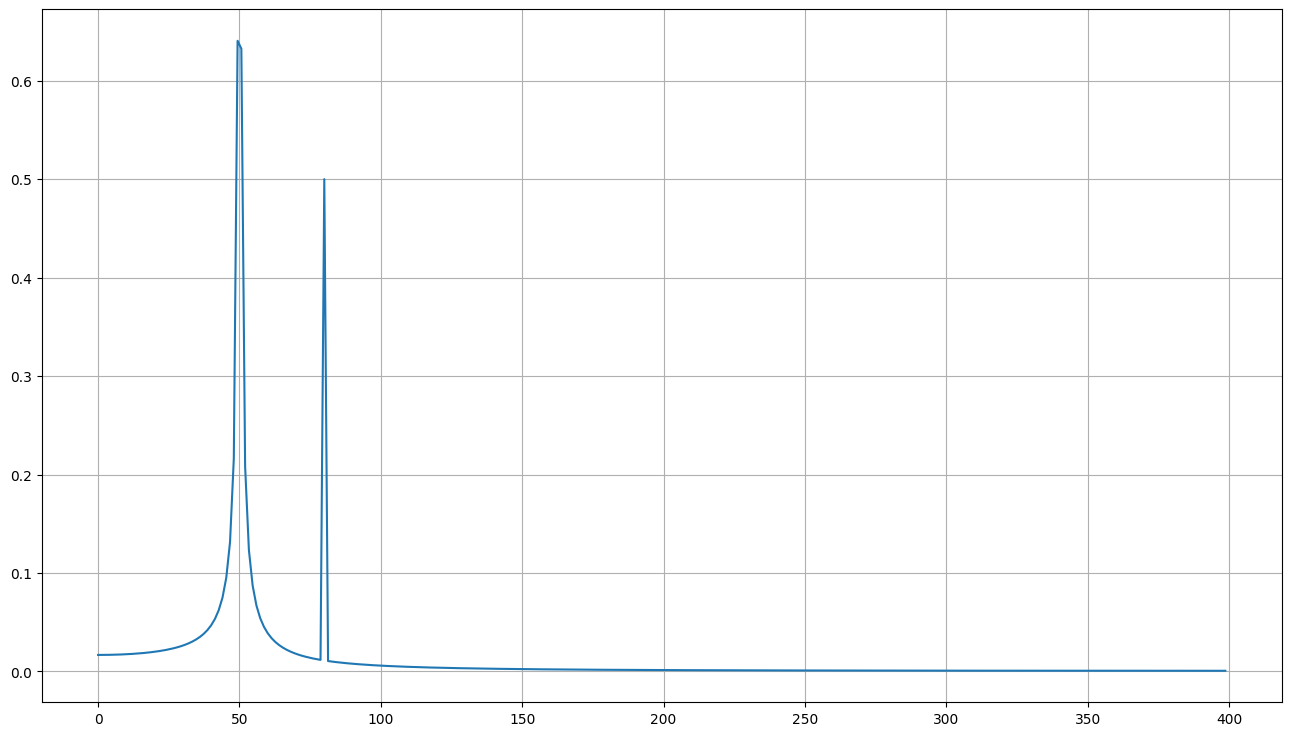

In [1]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

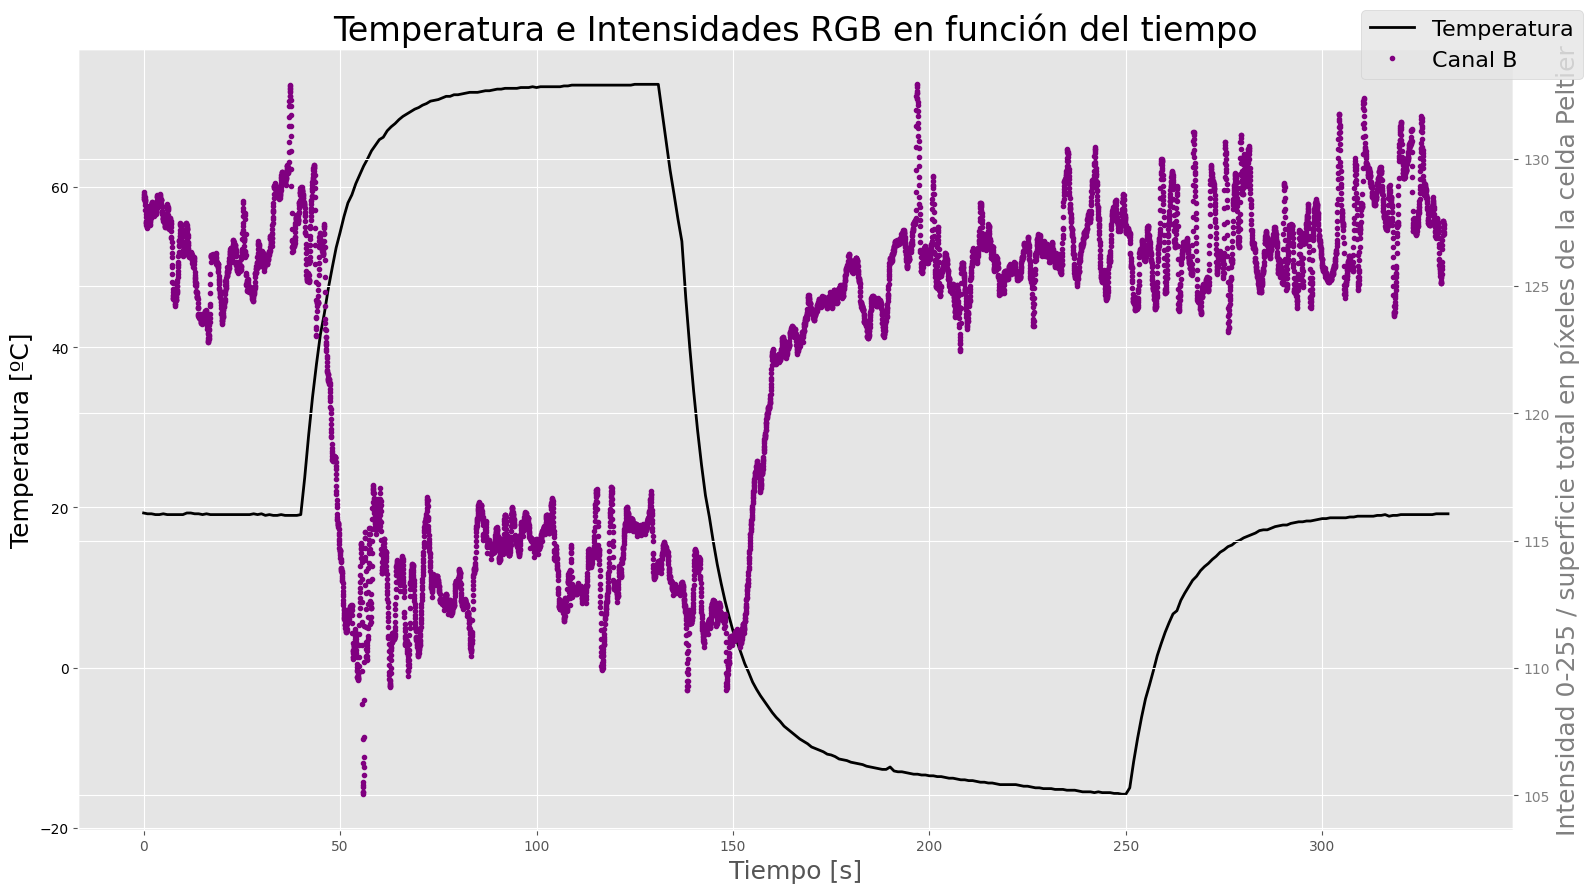

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(16, 9))

# Primer eje: Temperatura
ax1.set_title('Temperatura e Intensidades RGB en función del tiempo', fontsize=24)
ax1.plot(t, df['temp'], 'k-', label='Temperatura', linewidth=2)
ax1.set_xlabel('Tiempo [s]', fontsize=18)
ax1.set_ylabel('Temperatura [ºC]', fontsize=18, color='k')
ax1.tick_params(axis='y', labelcolor='k')

# Segundo eje: Intensidad RGB
ax2 = ax1.twinx()

ax2.plot(df_video['t'], intensidad, '.',color='purple', label=f'Canal {i.upper()}')

ax2.set_ylabel('Intensidad 0-255 / superficie total en píxeles de la celda Peltier', fontsize=18, color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Leyenda combinada corregida
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='upper right', fontsize=16)

plt.tight_layout()
plt.savefig('graficos/temperatura_intensidad_combinada.png', bbox_inches='tight', dpi=150)
plt.show()
